In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Đọc file CSV
file_path = "Clean_data/clean_data_train.csv"
df = pd.read_csv(file_path)

df.head()

,year,month,day,hour_value,minute,weather,temperature,wind_speed,wind_angle,humidity,pressure,visibility
0,2019,1,1,0,0,Clear,19.0,6.0,300.0,88.0,1023.0,6.0
1,2019,1,1,0,30,Clear,19.0,4.0,310.0,88.0,1023.0,6.0
2,2019,1,1,1,0,Clear,19.0,6.0,300.0,88.0,1022.0,6.0
3,2019,1,1,1,30,Clear,19.0,6.0,310.0,88.0,1022.0,6.0
4,2019,1,1,2,0,Clear,19.0,9.0,310.0,88.0,1022.0,6.0


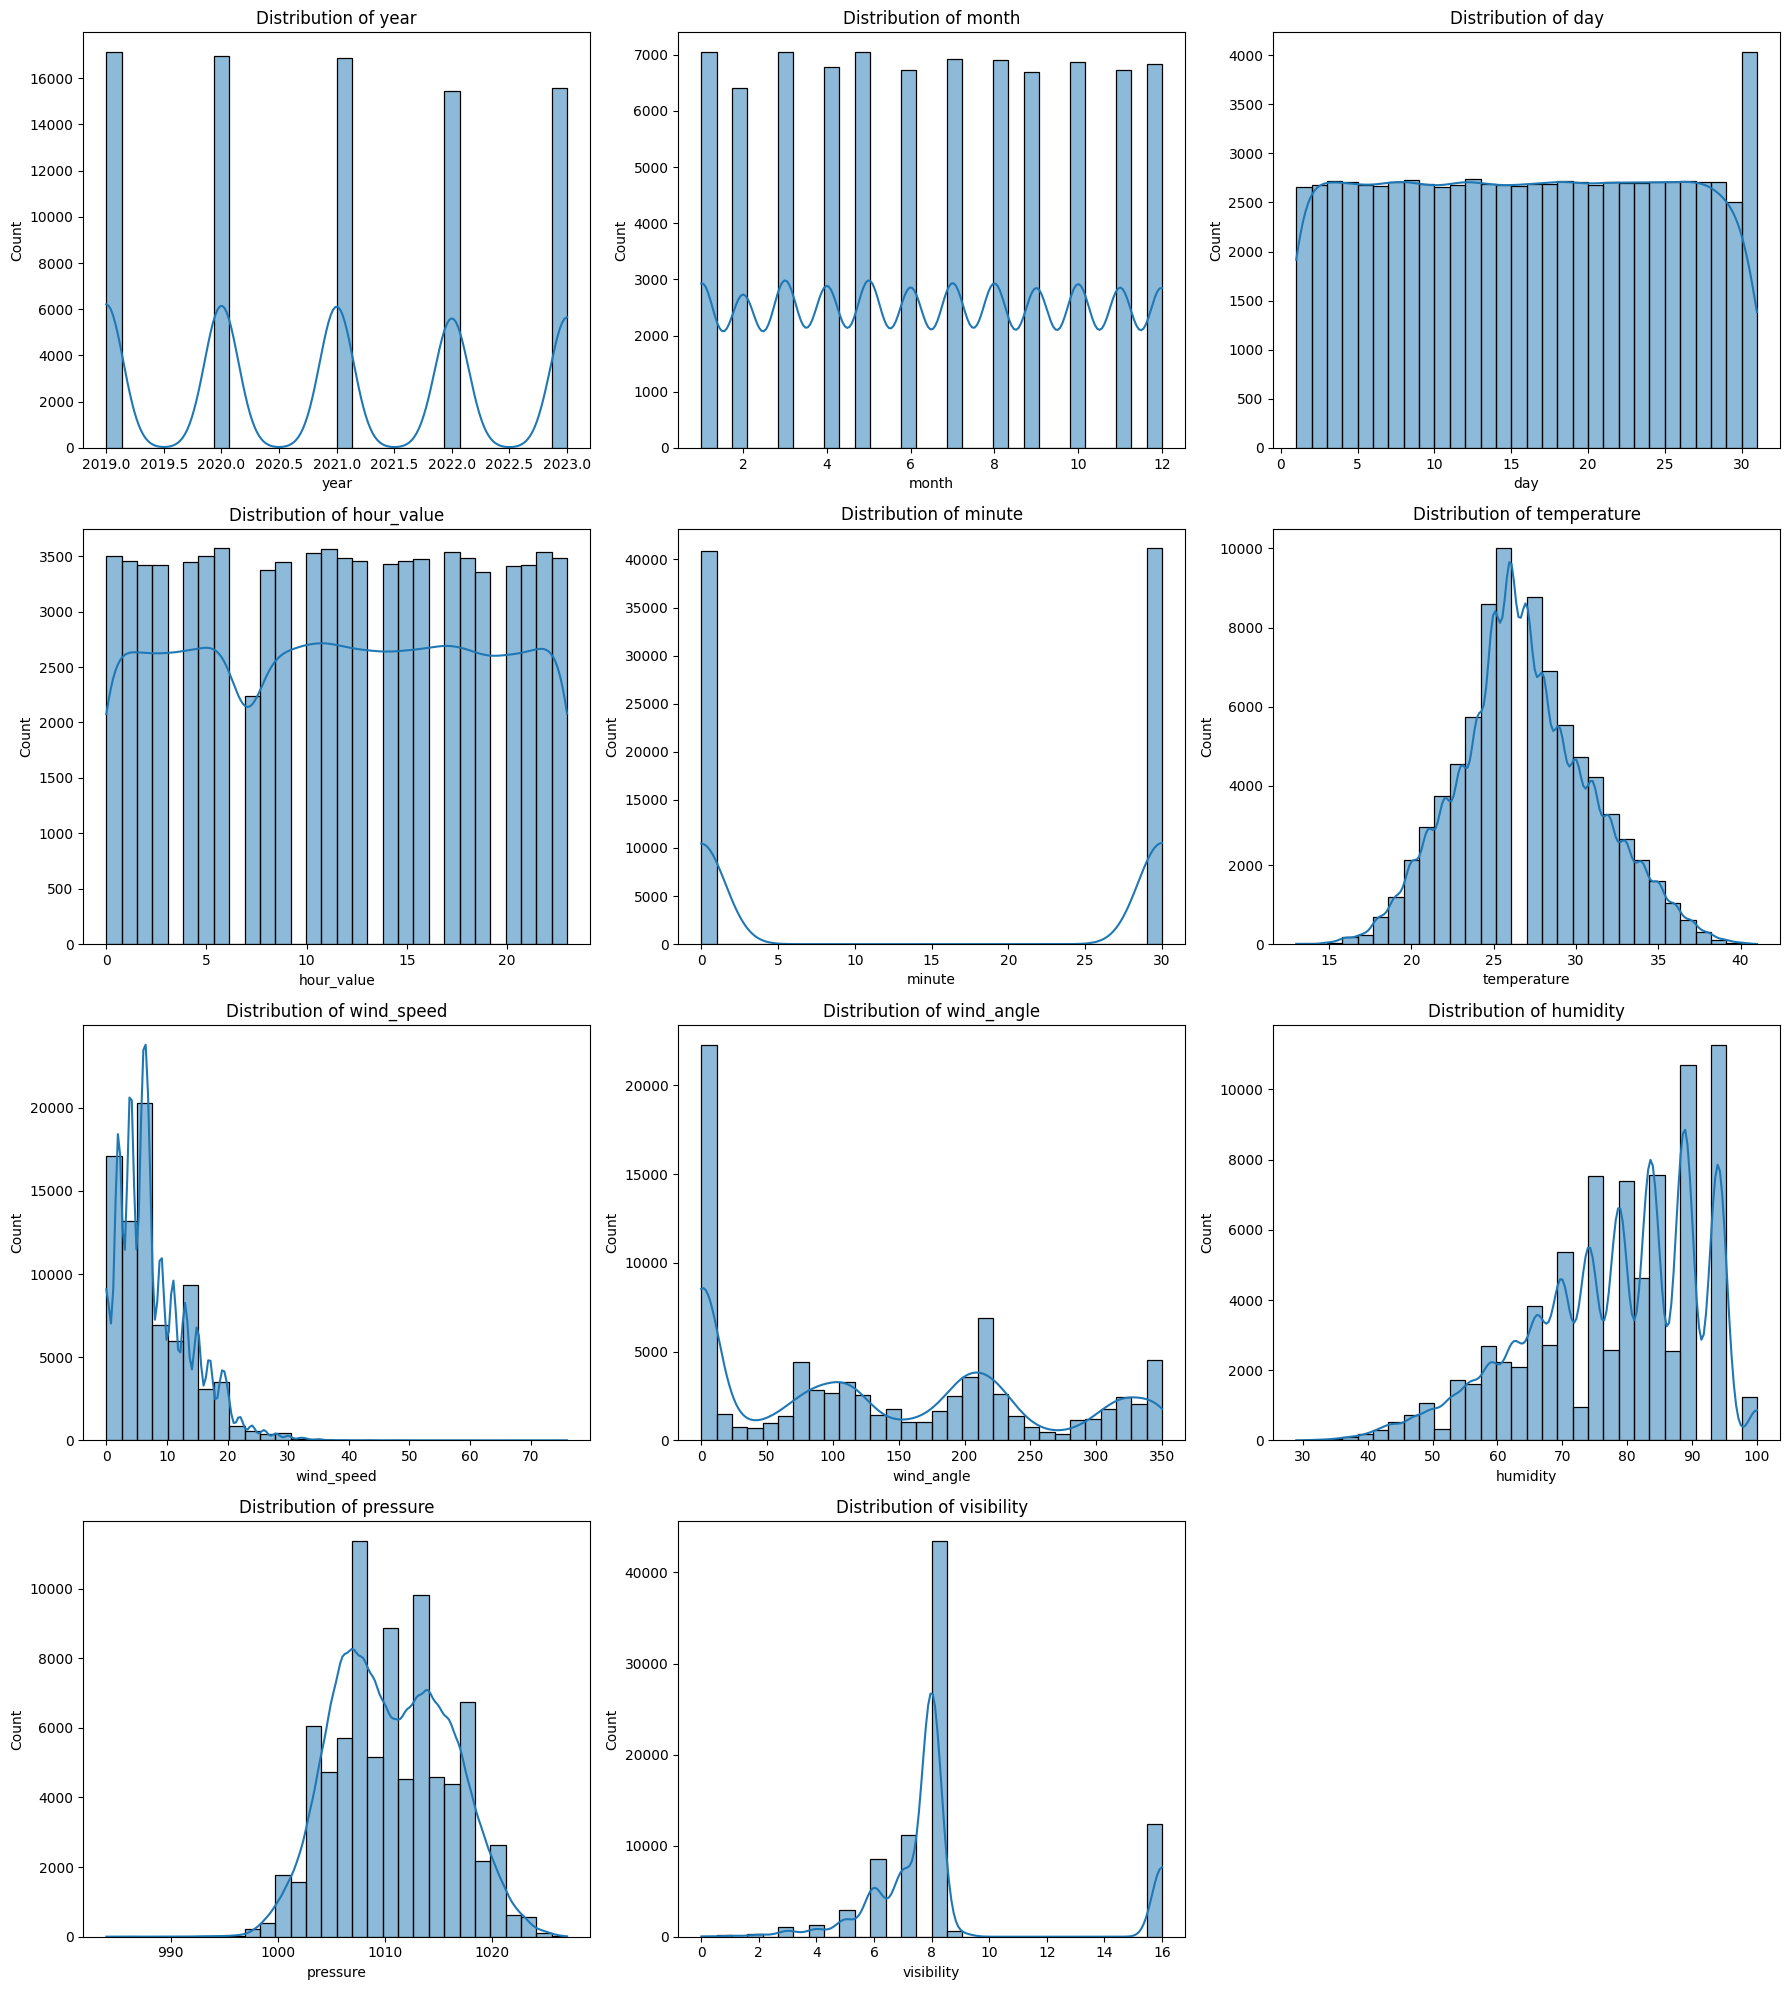


🌀 Số lượng giá trị weather khác nhau: 5
📋 Danh sách các giá trị weather:
- Clear
- Cloudy
- Foggy
- Rainy
- Stormy


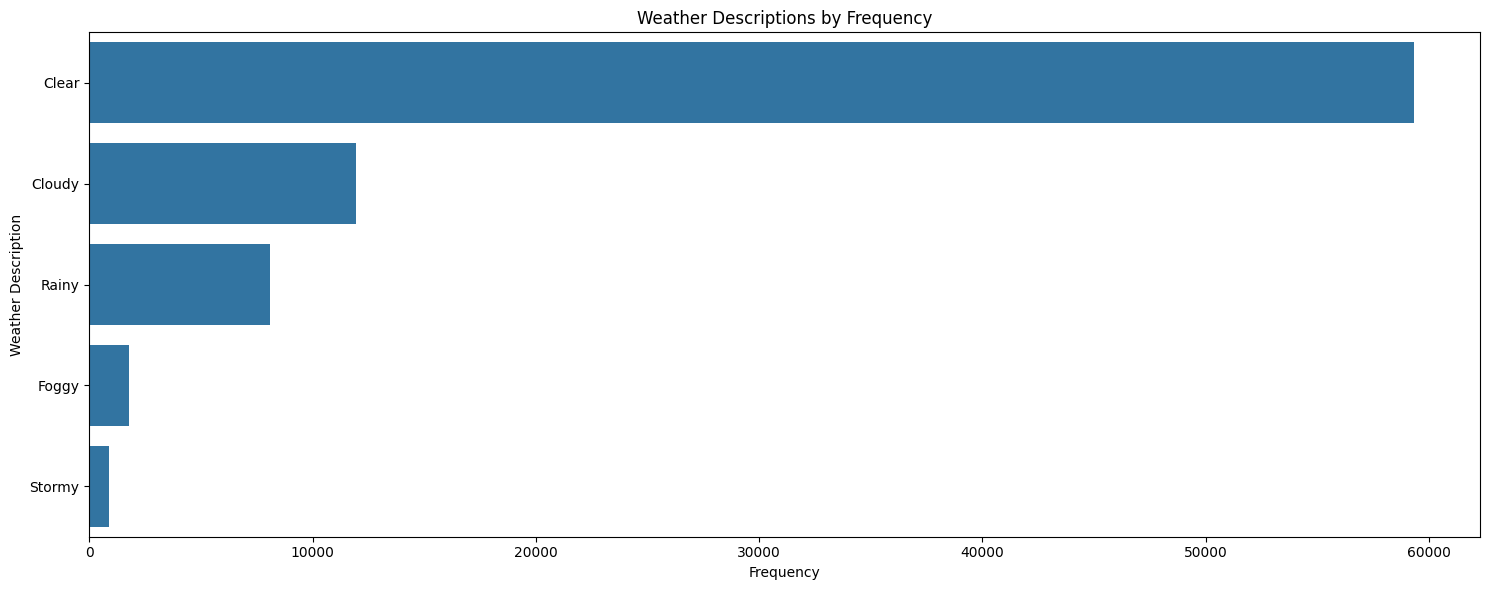

In [3]:
# Vẽ biểu đồ phân phối các biến số
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
n_cols = len(numeric_cols)
n_rows = math.ceil(n_cols / 3)

plt.figure(figsize=(18, 5 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 3, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Xem các giá trị unique của cột weather
unique_weather = df["weather"].dropna().unique()
print(f"\n🌀 Số lượng giá trị weather khác nhau: {len(unique_weather)}")
print("📋 Danh sách các giá trị weather:")
for val in sorted(unique_weather):
    print("-", val)

# Vẽ biểu đồ tần suất cho các giá trị weather
plt.figure(figsize=(15, 6))
weather_counts = df['weather'].value_counts().head(20)
sns.barplot(x=weather_counts.values, y=weather_counts.index)
plt.title('Weather Descriptions by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Weather Description')
plt.tight_layout()
plt.show()